In [2]:
# imports
import io
import os
import sys
import dvc.api
import mlflow
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# adding scripts
sys.path.append('.')
sys.path.append('..')
sys.path.insert(1, '../scripts/')
import defaults as defs
import dataCleaner as dc
import dataVisualizer as dv

cleaner = dc.dataCleaner('data preparation notebook')
visualizer = dv.dataVisualizer('data preparation notebook')

--> <Logger dataCleaner (WARNING)>
logger <Logger dataCleaner (INFO)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (WARNING)>
logger <Logger dataVisualizer (INFO)> created at path: ../logs/visualizer_root.log
Data visualizer in action


In [4]:
# pandas settings
pd.set_option('display.max_columns', 30)

# version of the data
# v1 : gdrive 
# v2 : local messed up store
# v3 : local correct store
version = 'v3'

# read data sets using dvc api
test_data_url = dvc.api.get_url(path = defs.test_local_path, 
                                repo = defs.repo, 
                                rev = version)

train_data_url = dvc.api.get_url(path = defs.train_local_path, 
                                repo = defs.repo, 
                                rev = version)

store_data_url = dvc.api.get_url(path = defs.store_local_path, 
                                repo = defs.repo, 
                                rev = version)
print('test data path: ' + test_data_url, '\ntrain data path: ' + train_data_url, '\nstore data path: ' + store_data_url)

test data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\70\2189c326ce783ff913ddd6ff984946 
train data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\d4\7aedd9e2d580e06a6ef7ce1732e8b6 
store data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\30\c9ccb5af66c21f65e7d1da967e6251


In [5]:
# reading csv files
DateCols = ['Date']
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

"""test_data = pd.read_csv(io.StringIO(test_data_url), na_values=missing_values, parse_dates=DateCols, low_memory=False)
train_data = pd.read_csv(io.StringIO(train_data_url), na_values=missing_values, parse_dates=DateCols, low_memory=False)
store_data = pd.read_csv(io.StringIO(store_data_url), na_values=missing_values, low_memory=False)"""

test_data = pd.read_csv(test_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
train_data = pd.read_csv(train_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
store_data = pd.read_csv(store_data_url, na_values=missing_values, low_memory=False)

# Data preparation

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [7]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Missing values

In [9]:
cleaner.percent_missing(train_data)
cleaner.percent_missing(test_data)
cleaner.percent_missing(store_data)

The dataset contains 0.0 % missing values
The dataset contains 0.0033464759 % missing values
The dataset contains 21.0134529148 % missing values


### Visualize missing columns

In [ ]:
missing_df = cleaner.missing_values_table(store_data)

In [ ]:
missing_df

In [ ]:
store_data[missing_df.index]

#### Filling missing values

##### Store data set

In [ ]:
# filing the competition distance feature
max_dist = store_data['CompetitionDistance'].max()
cleaner.fix_missing_value(store_data, ['CompetitionDistance'], max_dist)

In [ ]:
# filling the competition open since year and month features
min_year = store_data['CompetitionOpenSinceYear'].min()
cleaner.fix_missing_value(store_data, ['CompetitionOpenSinceYear'], min_year)
cleaner.fix_missing_value(store_data, ['CompetitionOpenSinceMonth'], 1)

In [ ]:
# filling the promo2since week and year features
cleaner.fix_missing_value(store_data, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

In [ ]:
# filling the promo interval feature
cleaner.fix_missing_value(store_data, ['PromoInterval'], '0,0,0,0')

##### Test data set

In [ ]:
open_mean = test_data['Open'].mean()
cleaner.fix_missing_value(test_data, ['Open'], open_mean)

In [ ]:
# final check for missing values
cleaner.percent_missing(train_data)
cleaner.percent_missing(test_data)
cleaner.percent_missing(store_data)

## Data types

### Store data type

In [ ]:
store_data.dtypes

In [ ]:
# change the object data types to string
string_columns = ['StoreType', 'Assortment']
store_data = cleaner.convert_to_string(store_data, string_columns)

In [ ]:
# change the float data types to int
float_columns = store_data.select_dtypes(include='float').columns.tolist()
store_data = cleaner.convert_to_int(store_data, float_columns)

In [ ]:
#  convert string types to int
store_data = cleaner.encode_to_numeric(store_data, ['StoreType', 'Assortment'])

In [ ]:
# convert float to int
store_data = cleaner.convert_to_int(store_data, ['CompetitionDistance', 'CompetitionOpenSinceMonth'])

In [ ]:
store_data.dtypes

### Train data type

In [ ]:
train_data.dtypes

In [ ]:
train_data['StateHoliday'].value_counts().index

In [ ]:
# convert the state holiday feature data type from mixed to string
train_data = cleaner.convert_to_string(train_data, ['StateHoliday'])

In [ ]:
# convert the string datatype to int
train_data = cleaner.encode_to_numeric(train_data, ['StateHoliday'])

In [ ]:
# convert float to int
train_data = cleaner.convert_to_int(train_data, ['Sales', 'Customers'])

In [ ]:
train_data.dtypes

### Test data types

In [ ]:
test_data.dtypes

In [ ]:
# change object data type to string
test_data = cleaner.convert_to_string(test_data, ['StateHoliday'])
test_data = cleaner.encode_to_numeric(test_data, ['StateHoliday'])

In [ ]:
# change float to int
test_data = cleaner.convert_to_int(test_data, ['Open'])

In [ ]:
test_data.info()

## Duplicates

In [ ]:
# search for duplicate rows and drop them
cleaner.drop_duplicates(train_data)
cleaner.drop_duplicates(test_data)
cleaner.drop_duplicates(store_data)

## Outliers

### Train data set

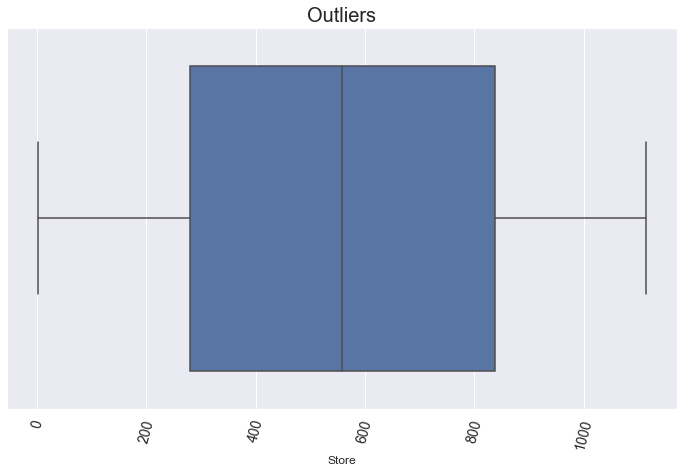

In [6]:
visualizer.plot_box(train_data, 'Store', 'Outliers')

In [7]:
visualizer.plot_box(train_data, 'DayOfWeek', 'Outliers')

NameError: name 'plot_box' is not defined

In [ ]:
visualizer.plot_box(train_data, 'Sales', 'Outliers')

In [ ]:
visualizer.plot_box(train_data, 'Customers', 'Outliers')

### Test data set

In [ ]:
visualizer.plot_box(test_data, 'Store', 'Outliers')

In [ ]:
visualizer.plot_box(test_data, 'DayOfWeek', 'Outliers')

### Store data set

In [ ]:
visualizer.plot_box(store_data, 'Store', 'Outliers')

In [ ]:
visualizer.plot_box(store_data, 'CompetitionDistance', 'Outliers')

In [ ]:
visualizer.plot_box(store_data, 'Promo2', 'Outliers')

In [ ]:
visualizer.plot_box(store_data, 'CompetitionOpenSinceMonth', 'Outliers')

### Fixing outliers

In [ ]:
cleaner.replace_outlier_with_median(dataFrame = train_data, feature = 'Sales')
cleaner.replace_outlier_with_median(dataFrame = train_data, feature = 'Customers')

# return float to int
train_data = cleaner.convert_to_int(train_data, ['Sales', 'Customers'])

In [ ]:
cleaner.replace_outlier_with_median(store_data, 'CompetitionDistance')
cleaner.replace_outlier_with_median(store_data, 'CompetitionOpenSinceMonth')

# return float to int
store_data = cleaner.convert_to_int(store_data, ['CompetitionDistance', 'CompetitionOpenSinceMonth'])

## Feature engineering

### Train data set

In [ ]:
train_data

In [ ]:
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)
train_data['WeekOfYear'] = train_data['Date'].apply(lambda x: x.weekofyear)
train_data['weekday'] = train_data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

In [ ]:
train_data

In [ ]:
train_data.info()

### Store data set

In [ ]:
# split the PromoInterval column into 4 columns
store_data['PromoInterval0'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 0)))
store_data['PromoInterval1'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 1)))
store_data['PromoInterval2'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 2)))
store_data['PromoInterval3'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 3)))

In [ ]:
# change the object data type of 
store_data = cleaner.convert_to_string(store_data, ['PromoInterval'])
store_data = cleaner.encode_to_numeric(store_data, ['PromoInterval'])

### A final look at our data frames

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
store_data

In [ ]:
train_data.info()
test_data.info()
store_data.info()

### Merging data sets

* Merge the store and train data sets into one data set

In [ ]:
# merging store_df and train_df
full_data = pd.merge(train_data, store_data, how = 'inner', on = 'Store')
full_data

In [ ]:
full_data.info()

### Save and version the prepared datasets

In [ ]:
train_data.to_csv(defs.train_local_path, index=False)
test_data.to_csv(defs.test_local_path, index=False)
store_data.to_csv(defs.store_local_path, index=False)
full_data.to_csv(defs.merged_local_path, index=False)